# Welcome

### _Haiopy is a Python package for audio recording, playback and monitoring._ 
### _This notebook is a good place for getting started with haiopy._
### _Here you will see examples of the most important haiopy functionalties._

## Overview
*   [Device]
*   [Record]
*   [Play]
*   [PlayRecord]
*   [Graphic User Interface (GUI)]
*   [To-Do's]

In [14]:
# import package
import haiopy as hp
import os

# Device
## Wrapper for the sounddevice package to access audio input and output devices

This class facilitates the access to the your onboard and external sound devices. <br>
Below you will see useful methods to retrieve information about your sound devices and  <br> 
also set your current input / ouput device (*.set_device*).

In [2]:
## Create an instance of Device Class
devices = hp.Device()

## Set your input/output device 
# inp (int): set your input device
# out (int): set your output device
devices.set_device(inp=0, out=1)

## Show current input/output devices
devices.show_io()

## Show maximum input/output channels of current input/output devices
devices.show_max_channels()

## Show all available audio devices
devices.show_all()


Input:
 {'name': 'Built-in Input', 'hostapi': 0, 'max_input_channels': 2, 'max_output_channels': 0, 'default_low_input_latency': 0.0029705215419501135, 'default_low_output_latency': 0.01, 'default_high_input_latency': 0.013129251700680272, 'default_high_output_latency': 0.1, 'default_samplerate': 44100.0}
Output:
 {'name': 'Built-in Output', 'hostapi': 0, 'max_input_channels': 0, 'max_output_channels': 2, 'default_low_input_latency': 0.01, 'default_low_output_latency': 0.0030839002267573695, 'default_high_input_latency': 0.1, 'default_high_output_latency': 0.013242630385487529, 'default_samplerate': 44100.0}

Max Channels for Input Device: 2
Max Channels for Output Device: 2
> 0 Built-in Input, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 Soundflower (2ch), Core Audio (2 in, 2 out)
  3 Soundflower (64ch), Core Audio (64 in, 64 out)
  4 Pro Tools Aggregate I/O, Core Audio (2 in, 2 out)
  5 Premiere Pro 6.0, Core Audio (0 in, 0 out)
  6 ZoomAudioDevice, Cor

# Record
## Recording and writing .wav / pyfar.Signal 
This class uses Soundedevice_Inputstream to record Audio in realtime and non-blocking. <br>
It can be accessed with the parameter *audio_in*, which specifies how you want to save the recorded data (.wav-file or pyfar.Signal). <br>
Additionally it holds all the important class-attributes for the Inputstream. The Defaults are as follows:

* *device_in* = 0 (Built-In-Input for Mac for Example)
* *blocksize* = 2048 Samples
* *buffersize* = 20 Samples
* *sampling_rate* = 48000 KHz
* *channels_in* = 2 Channels 
* *dtype* = 'float32' (numpy.dtype)


In wav-mode you can either just type a filname as a string or just give the argument 'wav', <br>
so it creates a pseudorandom filename beginning with 'Recording_xyz123':

In [3]:
## Create an instance of Record class with filename:
Rfile = hp.Record(audio_in='TestTest.wav',device_in=0,buffersize=20,blocksize=2048,sampling_rate=48000,channels_in=2,dtype='float32')

## Create an instance of Record class without filename:
Rwav = hp.Record(audio_in='wav',device_in=0,buffersize=20,blocksize=2048,sampling_rate=48000,channels_in=2,dtype='float32')

### If you want to use the Record-Class in signal-mode you can just create an instance as follows:

In [4]:
Rsig = hp.Record(audio_in='signal',device_in=0,buffersize=20,blocksize=2048,sampling_rate=48000,channels_in=2,dtype='float32')


### To actually start the recording you can call the class-method record and give it a parameter for *duration* in seconds. <br>
### If you use it in wav-mode it is non-blocking and you will find the file created on your harddrive in the same directory: 

In [5]:
Rwav.record(6) # recording non-blocking for 6 Seconds

Recording


### If you use the signal-mode the haiopy.Record-class becomes blocking and waits until duration to return a pyfar.Signal-object:

In [6]:
recorded_signal = Rsig.record(6) 

print(recorded_signal)

Recording
Stopped
Audio Signal
--------------------
(2,) channels with 286720 samples @ 48000.0 Hz sampling rate


In [ ]:
print(recorded_signal.shape[0])

# Play
## playback .wav or pyfar.Signal 

This class uses Sounddevice.Outputstreams for blockwise reading and streaming .wav-files or pyfar.Signals to the output device. <br>
It can be accessed with the parameter *audio_out*, which specifies whether the incoming audio is of type 'wav' or 'signal'. <br>
It holds the following class-attributes: 

* *device_out* = 1 (built-in-output for Mac for example)
* *blocksize* = 2048 Samples
* *buffersize* = 20 Samples
* *sampling_rate* = 48000 kHz
* *channels_out* = 2 Channels 
* *dtype* = 'float32' (numpy.dtype)

On initialisation it checks, whether your *audio_out* is of valid type, in the following example the check <br>
reports an error because of the .mp3-file:

In [10]:
Pfalse = hp.Play(audio_out='PlayPlay.mp3',device_out=1,buffersize=20,blocksize=2048,sampling_rate=48000,channels_out=2,dtype='float32')

TypeError: audio_in must be of type signal or wav

### If you want to playback a .wav-file make sure it is in the same folder as your python-script:


In [7]:
Pwav = hp.Play(audio_out='Sprache.wav',device_out=1,buffersize=20,blocksize=2048,sampling_rate=44100,channels_out=2,dtype='float32')

Pwav.play()

### For convenience we just use the previously recorded signal to demonstrate the haiopy signal-mode:


In [8]:
Pwav = hp.Play(audio_out=recorded_signal,device_out=1,buffersize=20,blocksize=2048,sampling_rate=48000,channels_out=2,dtype='float32')

Pwav.play()

# PlayRecord
## simultaneous playback and recording for .wav or pyfar.Signal 
This class combines the features of haiopy.Play and haiopy.Record with simultaneous playback and recording. <br>
This class can be used for measurements (i.e. room acoustics) to recieve direct information about the room transfer function. <br>
It holds the following class attributes:

* *device_in* = 0 (built_in-input for Mac)
* *device_out* = 1 (built-in-output for Mac)
* *blocksize* = 2048 samples
* *buffersize* = 20 samples
* *sampling_rate* = 48000 kHz
* *channels_in* = 2 channels 
* *channels_out* = 2 channels 
* *dtype* = 'float32' (numpy.dtype)

It is initialized with the already known parameters *audio_out* (.wav-File or Signal for Playback) <br> 
and *audio_in* (in which file-type the Audio is saved in). For the PlayRecord-Class it is possible <br>
to give and get pyfar.Signals or .wav-Files or even give a .wav-File and get a pyfar.Signal and vice versa:

In [9]:
# wav-files:
PRwav = hp.PlayRecord(audio_out='Sprache.wav',audio_in='wav',blocksize=2048,buffersize=20,channels_in=2,channels_out=2,sampling_rate=44100,dtype='float32')

PRwav.playrec()

In [10]:
# signal-files:
PRsig = hp.PlayRecord(audio_out=recorded_signal,audio_in='signal',device_in=0,device_out=1,buffersize=20,blocksize=2048,sampling_rate=48000,channels_in=2,channels_out=2,dtype='float32')

playrec_signal = PRsig.playrec()
print(playrec_signal)

Finished
Audio Signal
--------------------
(2,) channels with 286720 samples @ 48000 Hz sampling rate


In [12]:
# wav to signal:
PRwavsig = hp.PlayRecord(audio_out='Sprache.wav',audio_in='signal',device_in=0,device_out=1,buffersize=20,blocksize=2048,sampling_rate=44100,channels_in=2,channels_out=2,dtype='float32')

playrec_wavsig =  PRwavsig.playrec()
print(playrec_wavsig)

Finished
Audio Signal
--------------------
(2,) channels with 186368 samples @ 44100 Hz sampling rate


In [15]:
# signal to wav:
PRsigwav = hp.PlayRecord(audio_out=recorded_signal,audio_in='wav',device_in=0,device_out=1,buffersize=20,blocksize=2048,sampling_rate=48000,channels_in=2,channels_out=2,dtype='float32')

PRsigwav.playrec()

TypeError: writing_file_to_wav() missing 1 required keyword-only argument: 'q'

# Graphic User Interface (GUI)
## Tool that combines recording, playing and monitoring audio with python

The front-end GUI file exists as a separate python file, import haiopy, and then connect various functions and buttons through **pyqtSlot**. <br>
The structure of the entire UI is divided into left and right parts. <br> 
With recording options on the left and playback options on the right. <br>
On the right side, you can also switch between playback and Recplay through **TabWidget**. <br>
A **ProgressBar** is placed at the bottom to remind the user of the current recording and playback progress in real time. <br>

In addition, if the user directly presses the play button without selecting a file or the selected file is not a wav file, a popupwindow is created to remind the user to select the desired file. <br> 
The plot button in the recording box can plot the current audio signal input in real time, and the plot button in the playback box can plot the waveform of the selected wav file. <br>
The stop button can be used to stop at any time during recording and playback. <br>

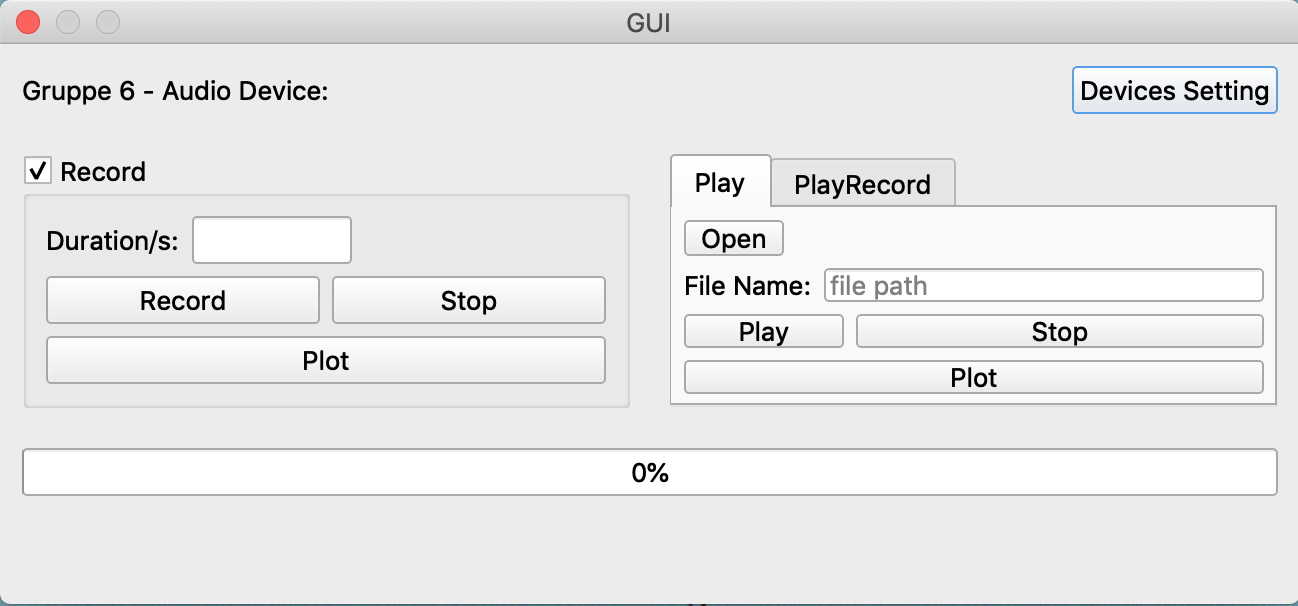

In [4]:
from IPython.display import Image
Image("GUI_picture.png",width=650, height=280)

# To-Do's
## The next steps include elaboration on:

* more monitoring possibilities: RMS-meters (e.g. with pyqt5, matplotlib)
* discrete input output channel selection